# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
import pandas as pd

penguins = pd.get_dummies(penguins, drop_first=True)
penguins = penguins.dropna()
penguins = penguins.astype(int)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39,18,181,3750,2007,0,0,0,1,1
1,39,17,186,3800,2007,0,0,0,1,0
2,40,18,195,3250,2007,0,0,0,1,0
4,36,19,193,3450,2007,0,0,0,1,0
5,39,20,190,3650,2007,0,0,0,1,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y = penguins["bill_depth_mm"]
X = penguins.drop(columns=["bill_depth_mm"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Model 1": ["bill_length_mm"],
    "Model 2": ["bill_length_mm", "flipper_length_mm"],
    "Model 3": ["bill_length_mm", "flipper_length_mm", "body_mass_g"],
    "Model 4": ["bill_length_mm", "flipper_length_mm", "body_mass_g",
                "species_Chinstrap", "species_Gentoo",
                "island_Dream", "island_Torgersen", "sex_male"]
}

rows = []
for name, Xcols in models.items():
    model = LinearRegression().fit(X_train[Xcols], y_train)

    y_train_pred = model.predict(X_train[Xcols])
    y_test_pred = model.predict(X_test[Xcols])

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    rows.append({
        "Model": name,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse,
        "Train R2": train_r2,
        "Test R2": test_r2
    })

results = pd.DataFrame(rows)
print(results)

     Model  Train RMSE  Test RMSE  Train R2   Test R2
0  Model 1    1.921555   1.997494  0.050182  0.060612
1  Model 2    1.603189   1.588028  0.338843  0.406268
2  Model 3    1.599768   1.572537  0.341662  0.417795
3  Model 4    0.841435   0.756088  0.817872  0.865408


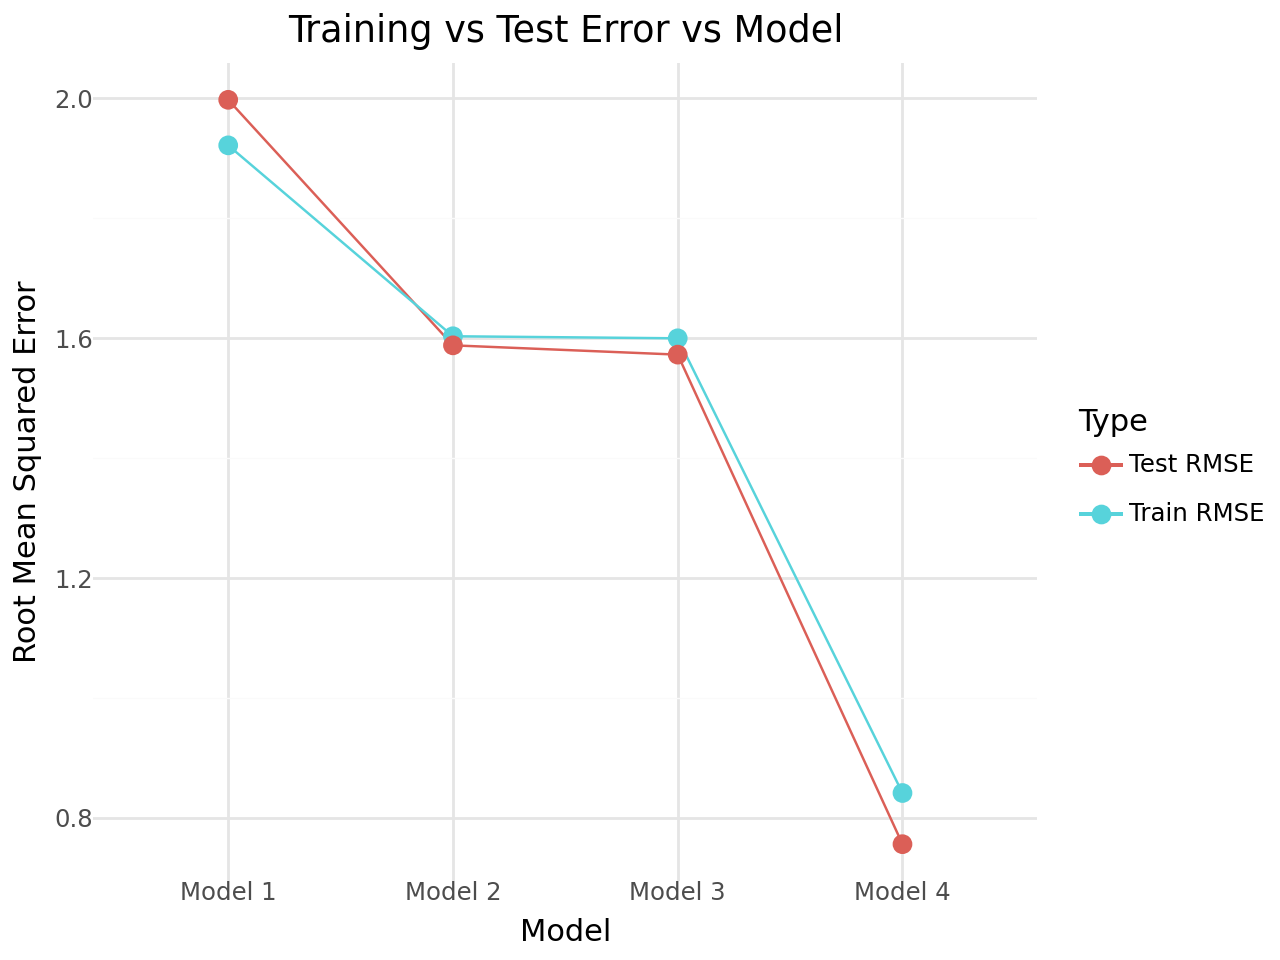

In [19]:
from plotnine import *

results_long = results.melt(id_vars="Model",
                            value_vars=["Train RMSE", "Test RMSE"],
                            var_name="Type", value_name="RMSE")

(
    ggplot(results_long, aes(x="Model", y="RMSE", color="Type", group="Type")) +
    geom_line() +
    geom_point(size=3) +
    labs(title="Training vs Test Error vs Model",
         x="Model",
         y="Root Mean Squared Error") +
    theme_minimal()
)
